# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

## Global attributes
Define the global attributes

In [193]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'

input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']

You can add your own global attributes here


In [194]:
training_datalist = []
validation_datalist = []

prediction_datalist = []

## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [195]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))


In [196]:
df = pd.read_csv(input_dataroot)
#print(df.dtypes)

## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [197]:
class Record:
    def __init__(self, epiweek, tempA, tempB, tempC, cityA, cityB, cityC):
        self._epiweek = epiweek
        self._tempA = tempA
        self._tempB = tempB
        self._tempC = tempC
        self._cityA = cityA
        self._cityB = cityB
        self._cityC = cityC
    
    @property
    def epiweek(self): return self._epiweek
    @property
    def tempA(self): return self._tempA
    @property
    def tempB(self): return self._tempB
    @property 
    def tempC(self): return self._tempC
    @property
    def cityA(self): return self._cityA
    @property
    def cityB(self): return self._cityB
    @property 
    def cityC(self): return self._cityC

    def Print(self):
        print(self._epiweek, self._tempA, self._tempB, self._tempC, self._cityA, self._cityB, self._cityC)

In [198]:
#Fill in missing values NaN with median of each city
def PreprocessData():
    df['TemperatureA'] = df['TemperatureA'].replace(np.NaN, df["TemperatureA"].median())
    df['TemperatureB'] = df['TemperatureB'].replace(np.NaN, df["TemperatureB"].median())
    df['TemperatureC'] = df['TemperatureC'].replace(np.NaN, df["TemperatureC"].median())

    name = ['TemperatureA', 'TemperatureB', 'TemperatureC']
    #Replace Outlier with median of each city 
    for i in range(3):        
        df_sub = df[name[i]]
        iqr = df_sub.quantile(0.75)- df_sub.quantile(0.25)
        lim = np.abs((df_sub-df_sub.median())/ iqr) < 2.22
        df[name[i]] = df_sub.where(lim, df[name[i]].median())


In [199]:
# training_datalist = df[0:75]
# validation_datalist = df[75:94]
# prediction_datalist = df[94:105]

In [200]:
def SplitData():
  global training_datalist, validation_datalist, prediction_datalist
  training_datalist = df[0:75]
  validation_datalist = df[75:94]
  prediction_datalist = df[94:105]

In [201]:
PreprocessData()
SplitData()

In [202]:
# def PutInOutput(datalist):    
#     for i in datalist:
#         r = [i.epiweek, i.tempA, i.tempB, i.tempC, i.cityA, i.cityB, i.cityC]
#         output_datalist.append(r)


### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [203]:


# ys = 200 + np.random.randn(100)
# x = [x for x in range(len(ys))]

# plt.plot(x, ys, '.')
# plt.plot(x, ys, '-')
# #plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

# plt.title("Sample Visualization")
# plt.show()

In [204]:
# Scatterplot with plt.plot vs plt.scatter
# # Data
# x = np.linspace(0,5,20)
# y1 = np.sin(x)
# y2 = np.sin(x+1)

# # Plot
# plt.plot(x,y1,'o',color='blue', label='plt.plot')
# plt.scatter(x, y2, c=y2, label='plt.scatter', cmap='Reds')

# # Decorate
# plt.title('Scatterplot with plt.plot vs plt.scatter')
# plt.xlabel('x- VALUE')
# plt.ylabel(' sine function ')
# plt.legend(loc='upper right')
# plt.colorbar()
# plt.show()

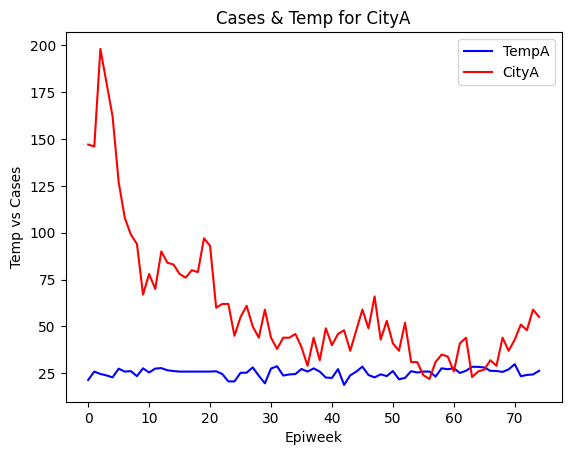

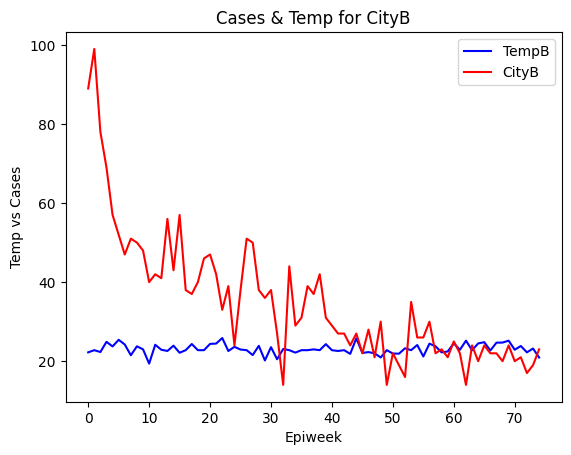

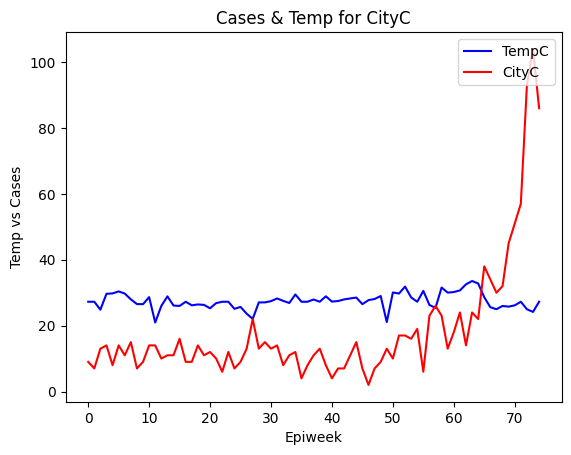

In [205]:
#CityA
x = training_datalist.index
y1 = training_datalist['TemperatureA']
y2 = training_datalist['CityA']
plt.plot(x,y1,'.', color='blue', label='TempA')
plt.plot(x,y2,'.', color='red', label='CityA')

plt.title('Cases & Temp for CityA')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()

#CityB
x = training_datalist.index
y1 = training_datalist['TemperatureB']
y2 = training_datalist['CityB']
plt.plot(x,y1,'.', color='blue', label='TempB')
plt.plot(x,y2,'.', color='red', label='CityB')

plt.title('Cases & Temp for CityB')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()

#CityC
x = training_datalist.index
y1 = training_datalist['TemperatureC']
y2 = training_datalist['CityC']
plt.plot(x,y1,'.', color='blue', label='TempC')
plt.plot(x,y2,'.', color='red', label='CityC')

plt.title('Cases & Temp for CityC')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()


In [206]:
# def PreprocessData():
#   return 0

### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [207]:
def Regression():
    return 0

### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [208]:
def MakePrediction(): 
  return 0

### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [209]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)